# Kaggle week — data exploration 🧙🏽🧑🏿‍🚀🧝🏼‍♂️
---

*Monday, 19 October 2020*
I’m giving myself the entire week to break into the top 100 of the Kaggle House Prices leaderboard. I’ll be following a checklist I saw in Hands-On Machine Learning by Aurelien Geron.

## Todo

**Frame the Problem and Look at the Big Picture**
- ✅ do a quick web search on what commonly leads to increases in house prices

**Explore the Data**
- ✅ load the data
- ✅ create a copy of the training data for exploration
- ✅ plot the variables you think cause higher prices with the sale price, and see if the plot confirms your assumption
- ✅ study each attribute and its characteristics
    - Name
    - Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
    - % of missing values
    - Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
    - Usefulness for the task
    - Type of distribution (Gaussian, uniform, logarithmic, etc.)
- ✅ visualize the data
- ✅ study correlations between attributes
- ✅ understand why attributes would need to be transformed in the first place
- ✅ summarize findings thus far in the notebook

**Prepare the Data**
- [todo] identify outliers for the top attributes
- [todo] fix or remove outliers
- [todo] fill in missing values or drop their rows
- [todo] drop attributes that don’t provide useful information for house price prediction
- [todo] check if any numerical continuous features should be discretized
- [todo] discretize continuous features if needed
- [todo] decompose categorical features
- [todo] add promising transformations of features (e.g., log( x ), sqrt( x ), x 2 , etc.).
- [todo] check if it would make sense to aggregate features into new features
- [todo] aggregate features into new features, if it makes sense
- [todo] if your model requires it, standardize or normalize features

**Shortlist Promising Models**
- [todo] train many quick-and-dirty models using standard parameters
- [todo] compute mean and standard deviation of n-fold cross validation performance
- [todo] analyze the importances of attributes for each algorithm
- [todo] analyze the types of errors the models make
- [todo] do a quick round of feature selection and engineering
- [todo] run one or two iterations of the past five steps 
- [todo] shortlist the top three models, preferring models making different errors

**Fine-Tune the System**
- [todo] fine-tune hyperparameters (treat data processing choices as parameteres)
- [todo] try ensemble methods
- [todo] measure teh performance of your final model on the test set

## Setup
---

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
from pandas.plotting import scatter_matrix
%matplotlib inline

## Frame the Problem and Look at the Big Picture
---

### *Do a quick web search on what commonly leads to increases in house prices*

I looked at a few random articles, and here are some things they said affected prices:
- year built
- \# bedrooms
- \# bathrooms
- square footage
- usable square footage
- subdivision
- proximity to POIs
- condition

## Get the Data
---

### *Get training data*

In [3]:
def load_train_data():
    target = "SalePrice"
    data = pd.read_csv("./train.csv", index_col="Id")
    features = [column for column in data.columns if not column == target]
    return data[features], data[target]

In [4]:
X_train, y_train = load_train_data()

### *Get test data*

In [5]:
def load_test_data():
    X_test = pd.read_csv("./test.csv", index_col="Id")
    y_test = pd.read_csv("./solution.csv", index_col="Id")
    return X_test, y_test

In [6]:
X_test, y_test = load_test_data()

## Explore the data
---

### *Create a copy of the training data for exploration*

In [7]:
def get_copy_for_exploration(X, y):
    return X.copy(deep=True), y.copy(deep=True)

In [8]:
X_explore, y_explore = get_copy_for_exploration(X_train, y_train)

In [9]:
data_explore = pd.concat([X_explore, y_explore], axis="columns")

### *Plot the variables you think cause higher prices with the sale price, and see if the plot confirms your assumption*

My brief web search pointed at these features:
- year built
- \# bedrooms
- \# bathrooms
- square footage
- usable square footage
- subdivision
- proximity to POIs
- condition

In [10]:
def get_seemingly_important_features(df):
    desired_features = ["OverallQual", "BedroomAbvGr", "FullBath", "GrLivArea", "Neighborhood", "YearBuilt", "YearRemodAdd", "GarageCars"]
    valid_features = [feature for feature in desired_features if feature in df.columns]
    return df[valid_features]

In [11]:
X_important = get_seemingly_important_features(X_explore)

In [12]:
data_important = pd.concat([X_important, y_explore], axis="columns")

Looking at the Seaborn pair grid below, most features indeed seem correlated with `SalePrice`. `BedroomAbvGr` looks like the one feature that’s not correlated.

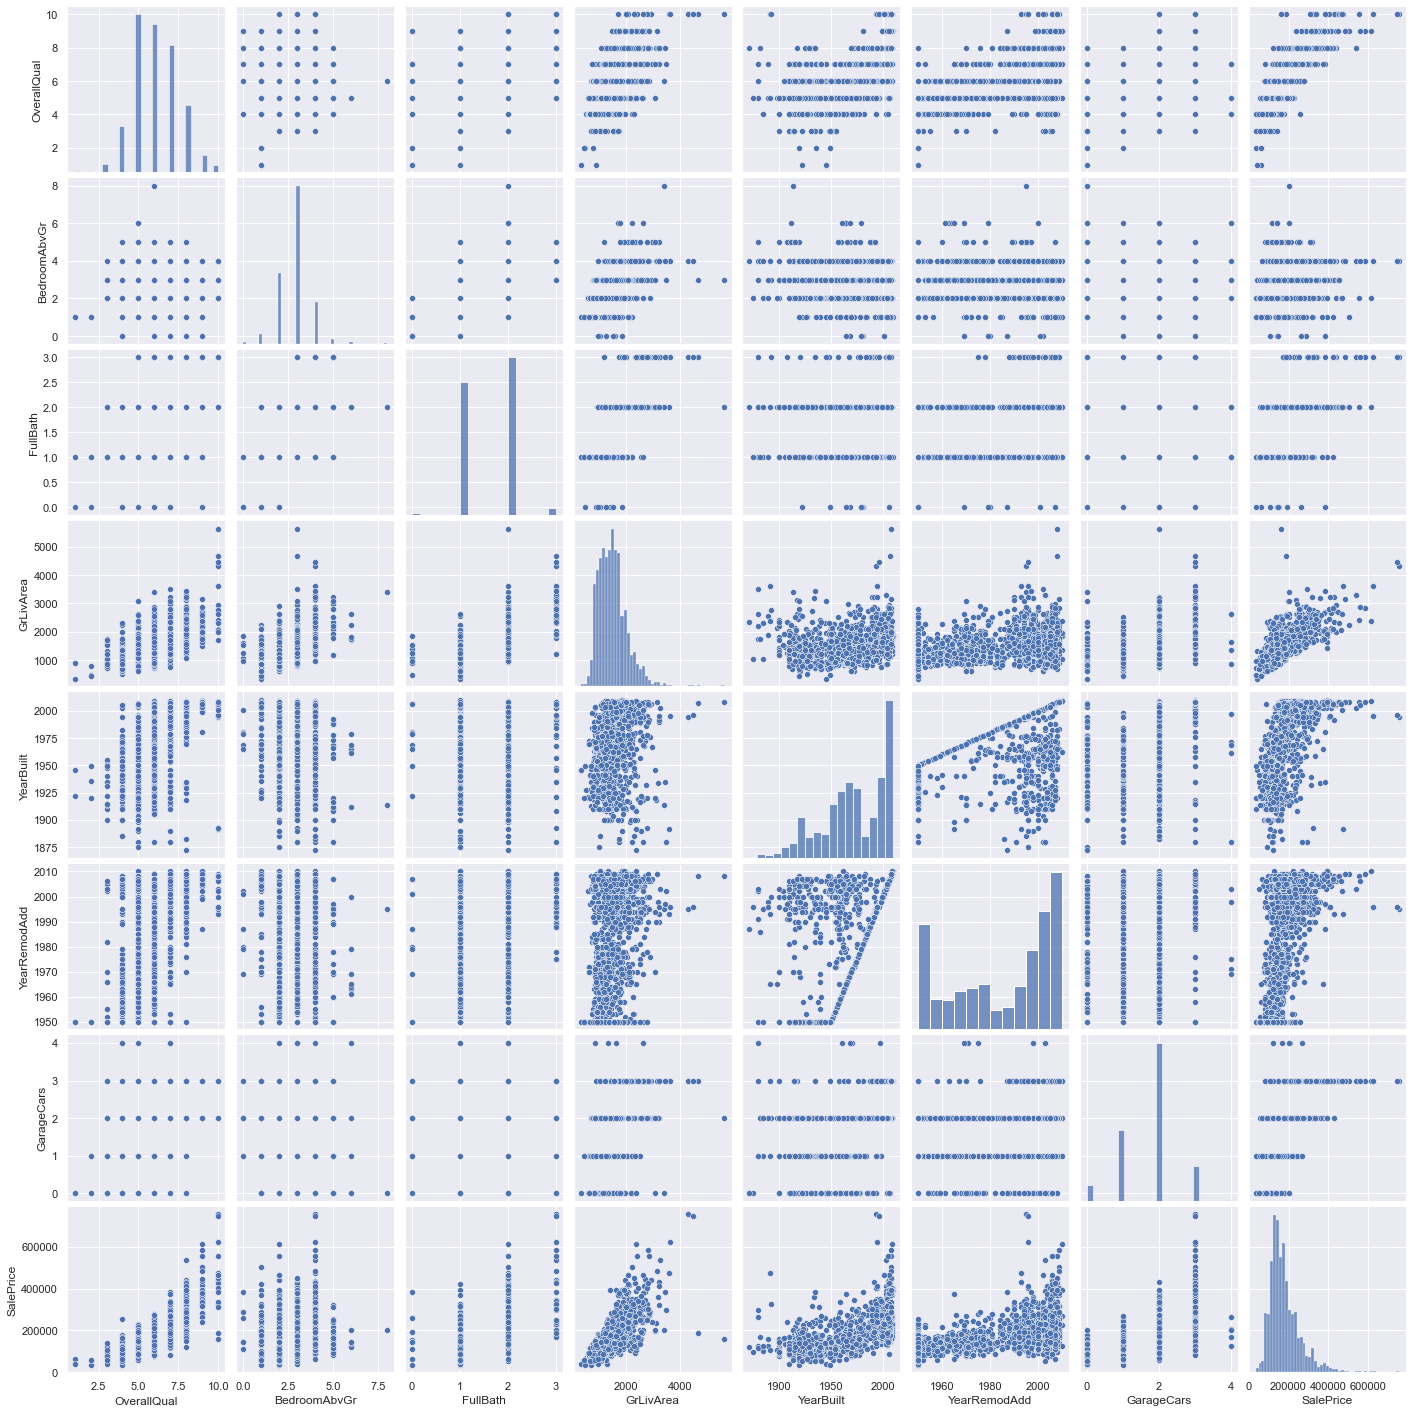

In [13]:
sns.set()
sns.pairplot(data_important)

### *Study each attribute and its characteristics*

There are 79 attributes in this dataset, so this might get tedious. I’ll go one by one and stop when I get tired. Whether the features correlate with `SalePrice` or not, this should be a good exercise in understanding variables.

- Name
- Type (categorical, int/float, bounded/unbounded, text, structured, etc.)
- % of missing values
- Noisiness and type of noise (stochastic, outliers, rounding errors, etc.)
- Usefulness for the task
- Type of distribution (Gaussian, uniform, logarithmic, etc.)

In [17]:
data_explore

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [23]:
pd.get_option("display.max_columns")

In [24]:
pd.set_option("display.max_columns", 20)
data_explore

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [39]:
pd.get_option("display.max_rows")

In [40]:
pd.set_option("display.max_rows", 60)

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

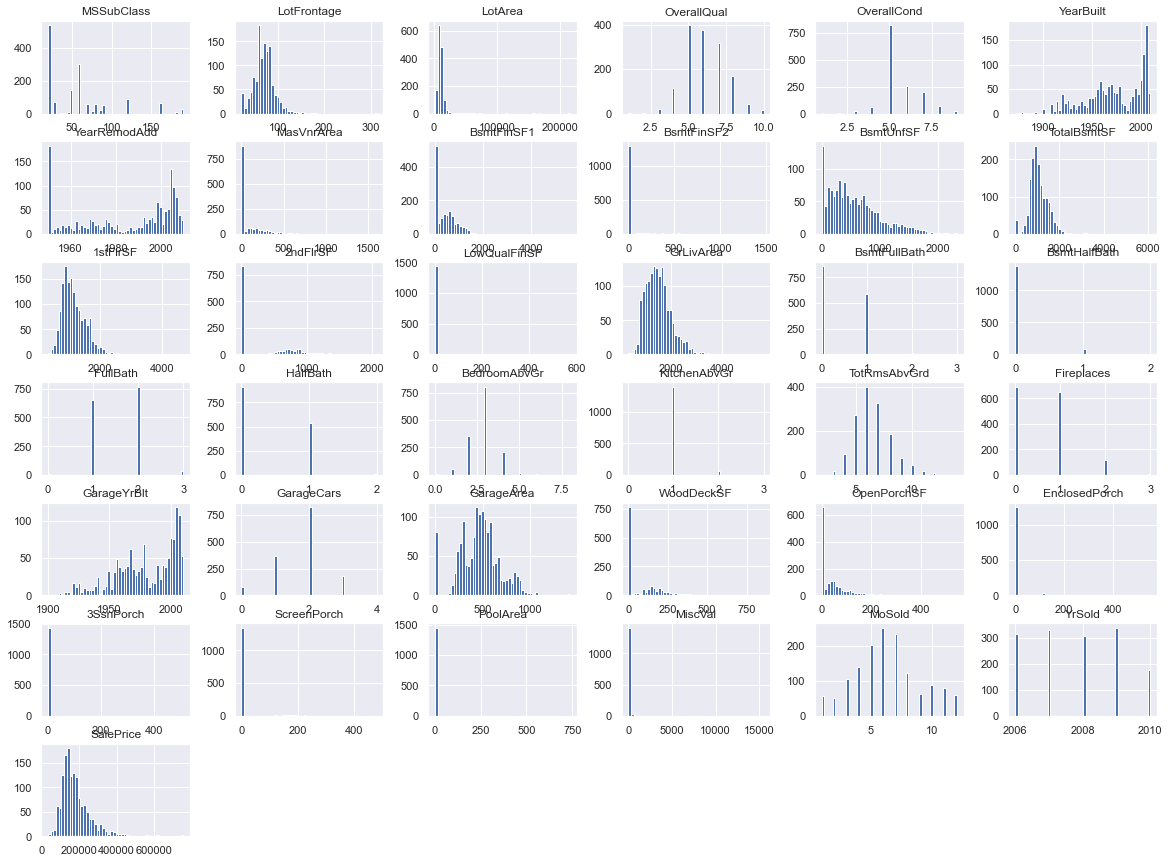

In [41]:
data_explore.hist(bins=50, figsize=(20, 15))

A lot of weird stuff going on in the histograms above. For example, what‘s up with `PoolArea`? It seems to always have a value of 0. Let’s zoom in on some of these sketchy attributes:

array([[<AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>],
       [<AxesSubplot:title={'center':'3SsnPorch'}>,
        <AxesSubplot:title={'center':'ScreenPorch'}>,
        <AxesSubplot:title={'center':'PoolArea'}>],
       [<AxesSubplot:title={'center':'MiscVal'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

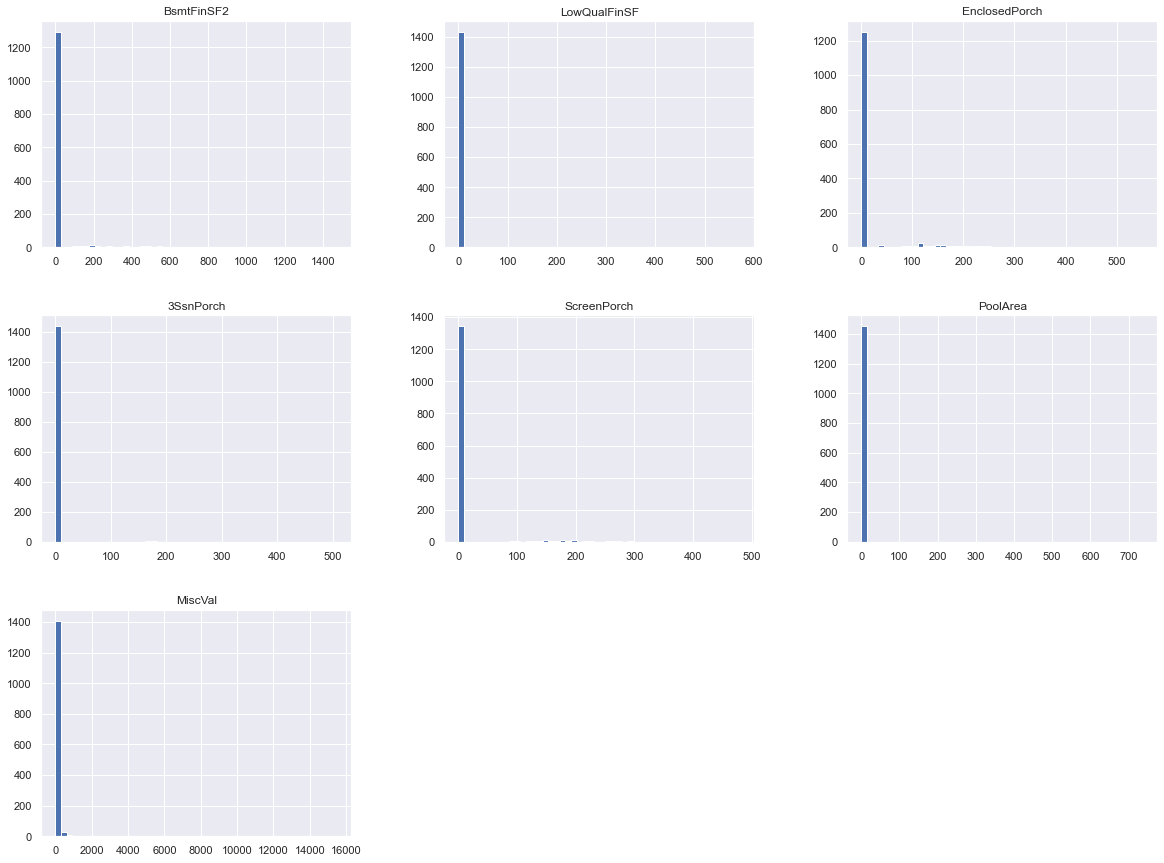

In [58]:
shady_attr_df = data_explore[["BsmtFinSF2", "LowQualFinSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]]
shady_attr_df.hist(bins=50, figsize=(20, 15))

In [59]:
shady_attr_df.describe()

,BsmtFinSF2,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,46.549315,5.844521,21.954110,3.409589,15.060959,2.758904,43.489041
std,161.319273,48.623081,61.119149,29.317331,55.757415,40.177307,496.123024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1474.000000,572.000000,552.000000,508.000000,480.000000,738.000000,15500.000000


In [64]:
shady_attr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   BsmtFinSF2     1460 non-null   int64
 1   LowQualFinSF   1460 non-null   int64
 2   EnclosedPorch  1460 non-null   int64
 3   3SsnPorch      1460 non-null   int64
 4   ScreenPorch    1460 non-null   int64
 5   PoolArea       1460 non-null   int64
 6   MiscVal        1460 non-null   int64
dtypes: int64(7)
memory usage: 131.2 KB


<AxesSubplot:>

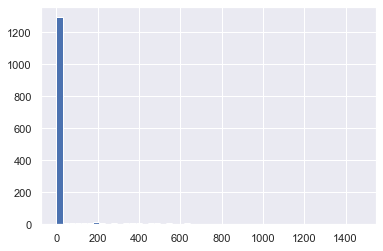

In [68]:
shady_attr_df["BsmtFinSF2"].hist(bins=50)

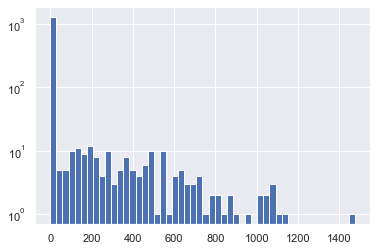

In [83]:
ax = shady_attr_df["BsmtFinSF2"].hist(bins=50)
ax.set_yscale("log")

,BsmtFinSF2,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,,,,,,,,
1,0,0,0,0,0,0,0,208500
2,0,0,0,0,0,0,0,181500
3,0,0,0,0,0,0,0,223500
4,0,0,272,0,0,0,0,140000
5,0,0,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...
1456,0,0,0,0,0,0,0,175000
1457,163,0,0,0,0,0,0,210000
1458,0,0,0,0,0,0,2500,266500


In [81]:
(shady_attr_df["BsmtFinSF2"] > 0).sum()

167

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='BsmtFinSF2', ylabel='SalePrice'>

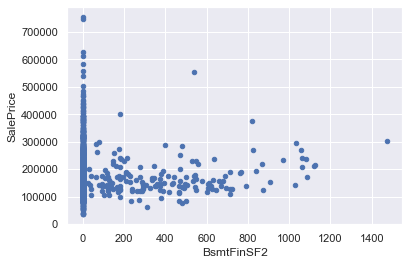

In [78]:
data = pd.concat([shady_attr_df, data_explore["SalePrice"]], axis="columns")
data.plot.scatter(x="BsmtFinSF2", y="SalePrice")

#### Names, types, and missing values

In [16]:
data_explore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

#### `Neighborhood`

In [46]:
data_explore["Neighborhood"].describe()

count      1460
unique       25
top       NAmes
freq        225
Name: Neighborhood, dtype: object

In [48]:
np.unique(data_explore["Neighborhood"])

array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
       'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'], dtype=object)

[Text(0, 0, 'CollgCr'),
 Text(1, 0, 'Veenker'),
 Text(2, 0, 'Crawfor'),
 Text(3, 0, 'NoRidge'),
 Text(4, 0, 'Mitchel'),
 Text(5, 0, 'Somerst'),
 Text(6, 0, 'NWAmes'),
 Text(7, 0, 'OldTown'),
 Text(8, 0, 'BrkSide'),
 Text(9, 0, 'Sawyer'),
 Text(10, 0, 'NridgHt'),
 Text(11, 0, 'NAmes'),
 Text(12, 0, 'SawyerW'),
 Text(13, 0, 'IDOTRR'),
 Text(14, 0, 'MeadowV'),
 Text(15, 0, 'Edwards'),
 Text(16, 0, 'Timber'),
 Text(17, 0, 'Gilbert'),
 Text(18, 0, 'StoneBr'),
 Text(19, 0, 'ClearCr'),
 Text(20, 0, 'NPkVill'),
 Text(21, 0, 'Blmngtn'),
 Text(22, 0, 'BrDale'),
 Text(23, 0, 'SWISU'),
 Text(24, 0, 'Blueste')]

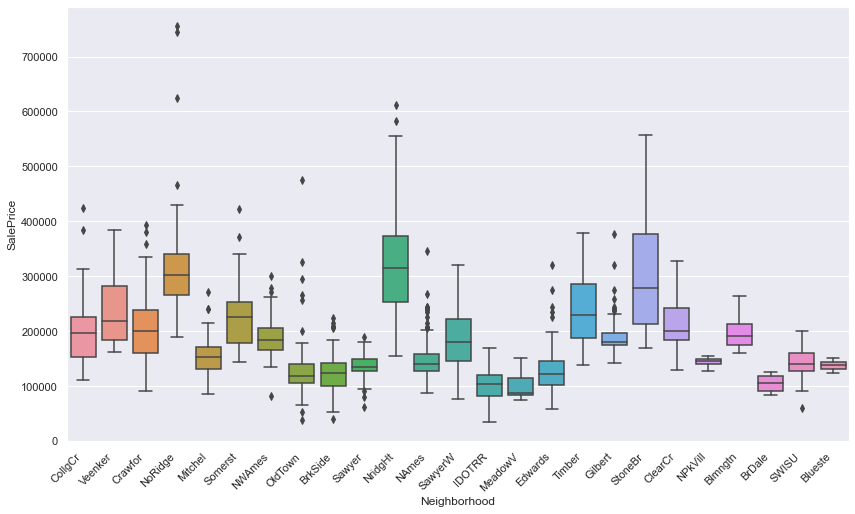

In [51]:
plt.figure(figsize=(14, 8))
plot = sns.boxplot(x="Neighborhood", y="SalePrice", data=data_explore)
plot.set_xticklabels(
    plot.get_xticklabels(),
    rotation=45,
    horizontalalignment="right"
)

#### `MSSubClass`

*Identifies the type of dwelling involved in the sale.*

-       20	1-STORY 1946 & NEWER ALL STYLES
-       30	1-STORY 1945 & OLDER
-       40	1-STORY W/FINISHED ATTIC ALL AGES
-       45	1-1/2 STORY - UNFINISHED ALL AGES
-       50	1-1/2 STORY FINISHED ALL AGES
-       60	2-STORY 1946 & NEWER
-       70	2-STORY 1945 & OLDER
-       75	2-1/2 STORY ALL AGES
-       80	SPLIT OR MULTI-LEVEL
-       85	SPLIT FOYER
-       90	DUPLEX - ALL STYLES AND AGES
-      120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
-      150	1-1/2 STORY PUD - ALL AGES
-      160	2-STORY PUD - 1946 & NEWER
-      180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
-      190	2 FAMILY CONVERSION - ALL STYLES AND AGES

<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

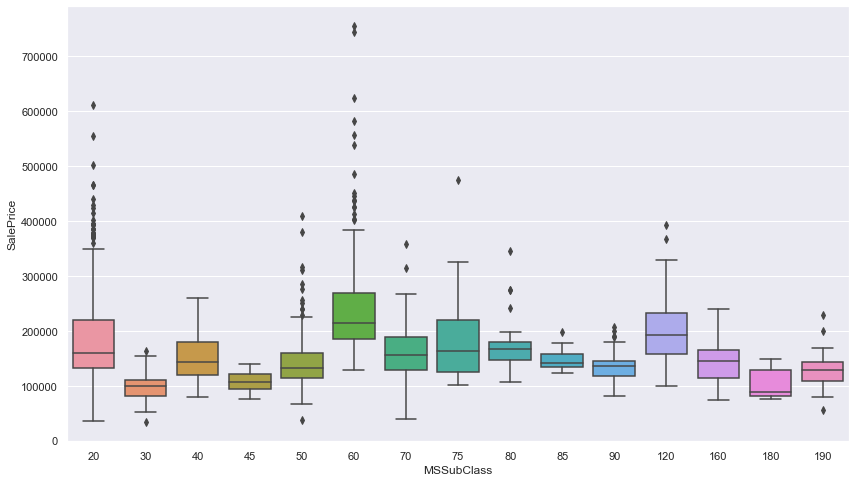

In [53]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="MSSubClass", y="SalePrice", data=data_explore)

### *Study correlations between attributes*

In [84]:
corr_matrix = data_explore.corr()

In [85]:
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

<AxesSubplot:>

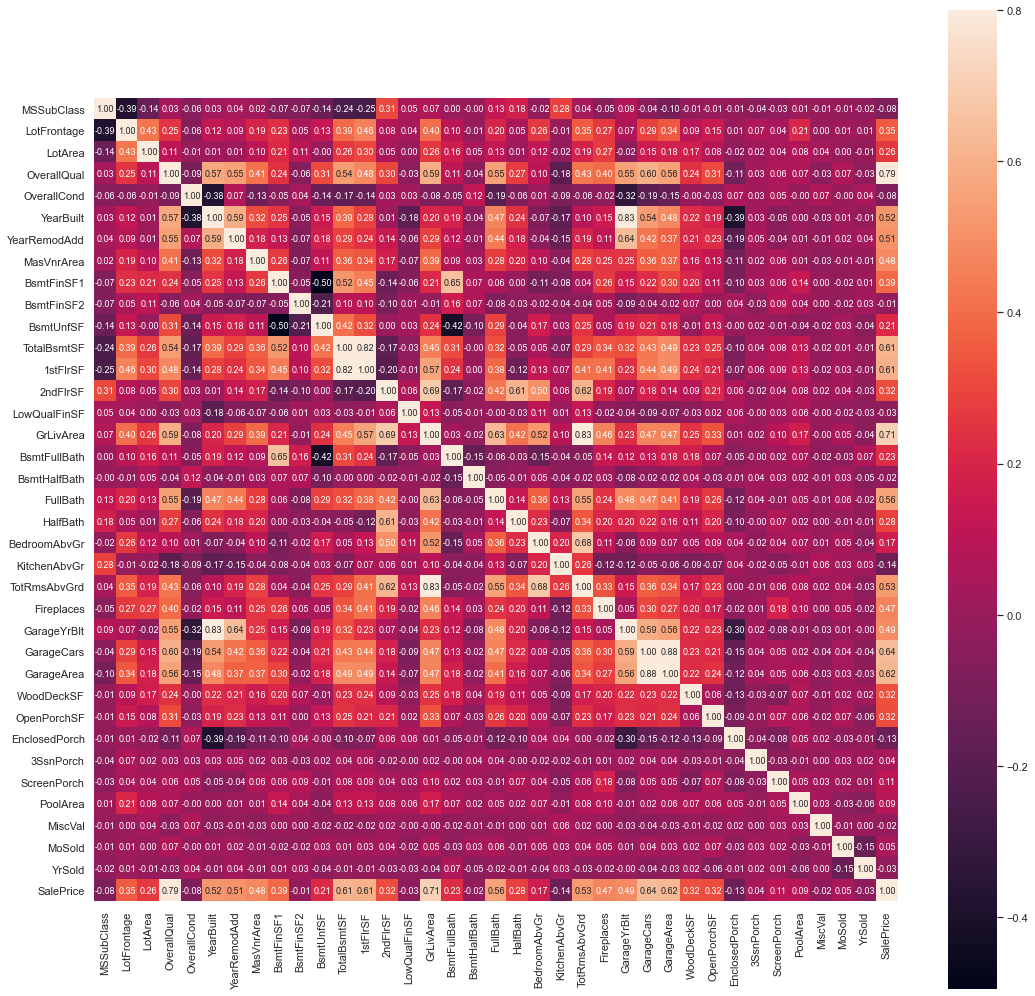

In [100]:
plt.figure(figsize=(18, 18))
sns.heatmap(corr_matrix, vmax=0.8, square=True, annot=True, fmt=".2f", annot_kws={"size": 9})

### *Understand why attributes would need to be transformed in the first place*

I was specifically intrigued by others performing a *log*, or a *sqrt*, or some other arbitrary transformation of an attribute. This was ostensibly to bend the distribution curve of an attribute into a more *normal* shape. Removing skew, removing kurtosis, removing peakedness. I get that this is a goal, but why is that necessarily better?

After searching around a bit, all I could find was vague statements that *normalized numeric features let most models perform better*. Google’s [Introduction to Transforming Data](https://developers.google.com/machine-learning/data-prep/transform/introduction) is an example of that.

I’m going to drop this topic and take the need to transform to normalize at face value for now. Maybe I can explore this later, when I can train a model without normalization, and with it, and compare the results.

### *Summarize findings thus far in the notebook*

Some things have been clarified, but some are still confusing to me.

- some common sense hunches about which attributes would correlate with higher prices were correct
- plotting pairs of predictors and labels provided nice insight into which attributes might affect the price; this was confirmed in the correlation matrix, and seen clearly in the heatmap
- the box plots for the categorical attributes `Neighborhood` and `MSSubClass` (which identifies the type of dwelling) seem to indicate that some category values lead to higher prices; but it’s unclear to me right now how I could put some sort of number on it, like I did by computing the correlation matrix for numerical features
- interestingly, some categorical features like `OverallQual` are represented as integers, and they *can* be used to compute correlations; does this mean I could compute correlations for other categorical features like `Neighborhood` if I transformed them into numerical features? And could I still do that if I used one-hot encoding for `Neighborhood` because I wouldn’t want to indicate any kind of order by representing the neighborhoods as numbers?

## Prepare the Data
---

### 1. Data cleaning

#### *Identify outliers for the top attributes*

I initially used Seaborn’s pairplot grid for this, but it was overwhelming. Instead, I’ll manually plot top-correlated numerical attributes against the sale price.

In [116]:
top_attributes = corr_matrix["SalePrice"].sort_values(ascending=False).iloc[:10]
top_data = data_explore[top_attributes.index]

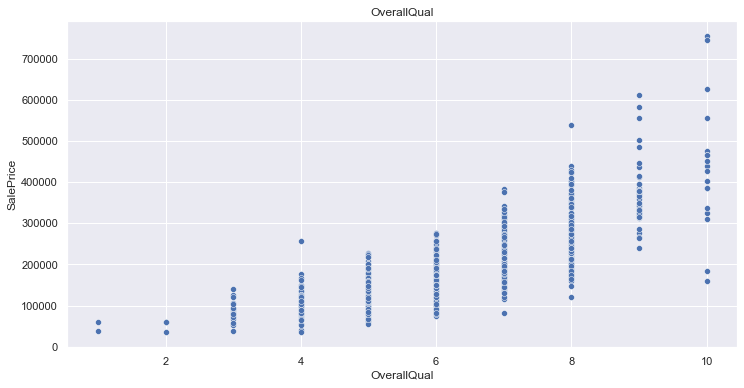

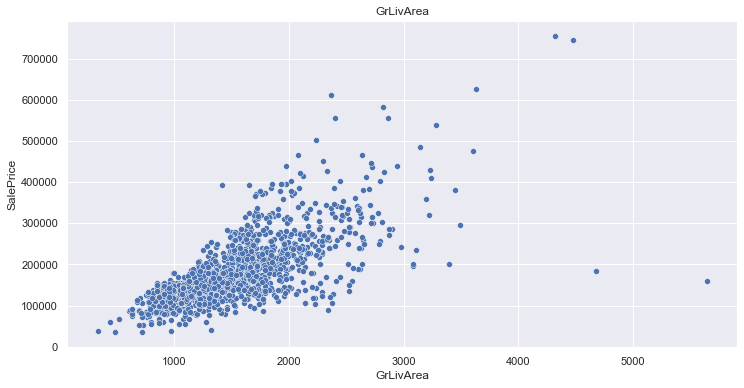

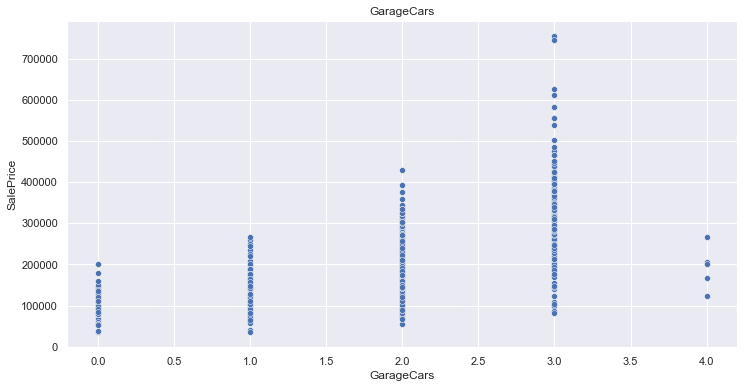

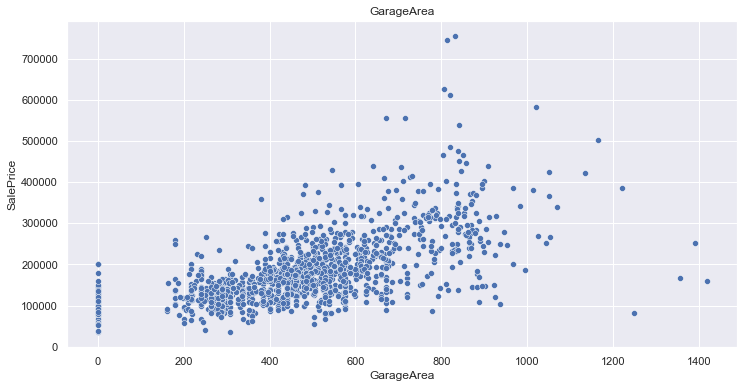

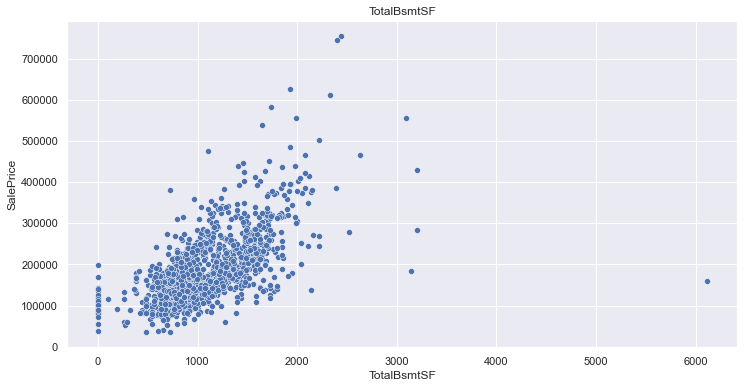

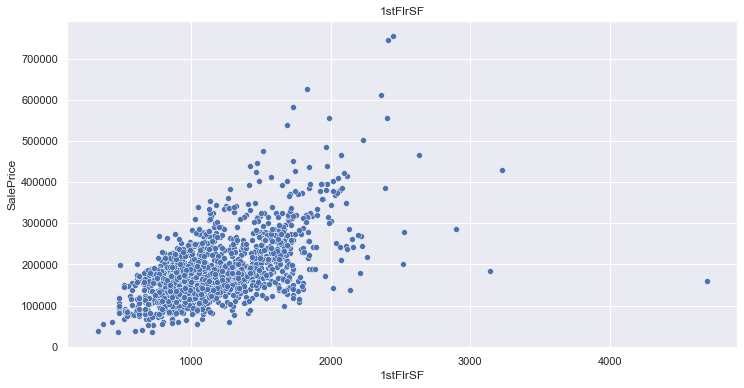

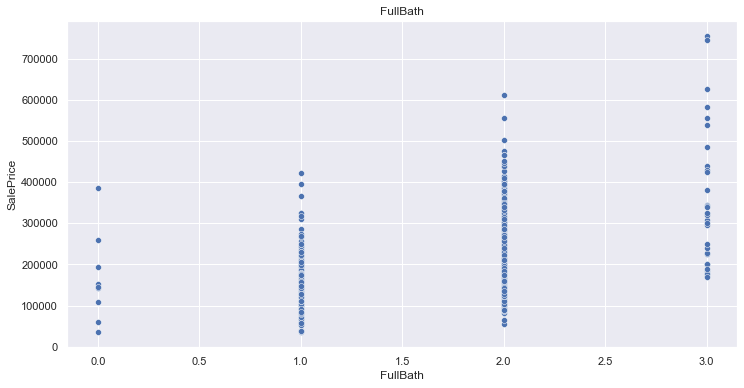

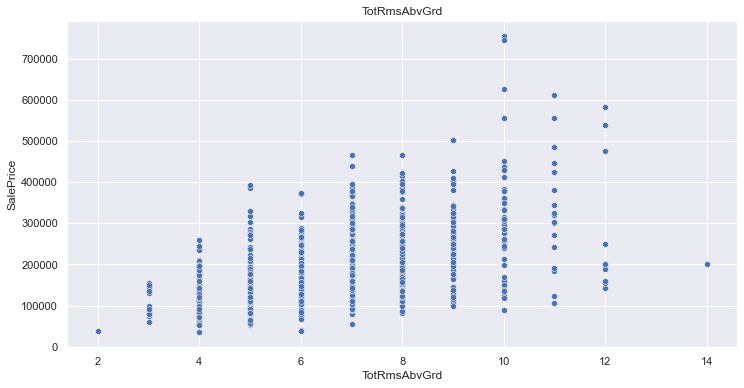

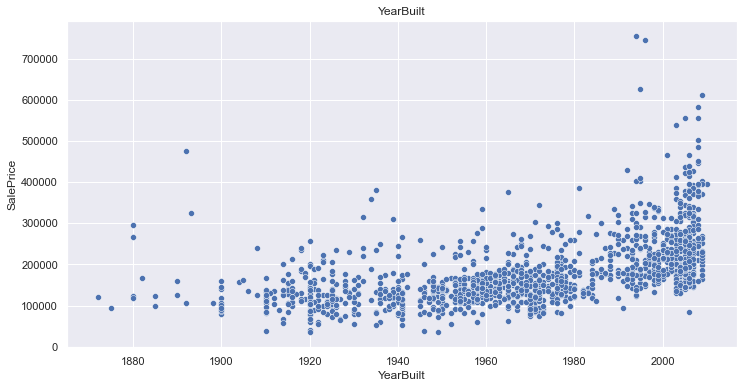

In [146]:
for idx, attribute in enumerate(top_data):
    if (attribute == "SalePrice"):
        continue
        
    plt.figure(figsize=(12, 6))
    plt.title(attribute)
    sns.scatterplot(data=top_data, x=attribute, y="SalePrice")

Okay, there are a few outliers in `GrLivArea`. The author of this dataset actually recommends they be removed before being given to students.

#### *Fix or remove outliers*

#### *Drop attributes that have too many missing values*

In [251]:
def na_info(df):
    total = df.isnull().sum()
    percentage = (total / len(df))
    na_info = pd.concat([total, percentage], axis="columns", keys=["Total", "Percentage"])
    return na_info.sort_values(by="Total", ascending=False)

In [252]:
missing_data = na_info(data_explore)
missing_data

,Total,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
...,...,...
Heating,0,0.000000
HeatingQC,0,0.000000
MSZoning,0,0.000000
1stFlrSF,0,0.000000


In [226]:
# "{:10.4f}".format(x)
"{} — {}".format(1, 2)

'1 — 2'

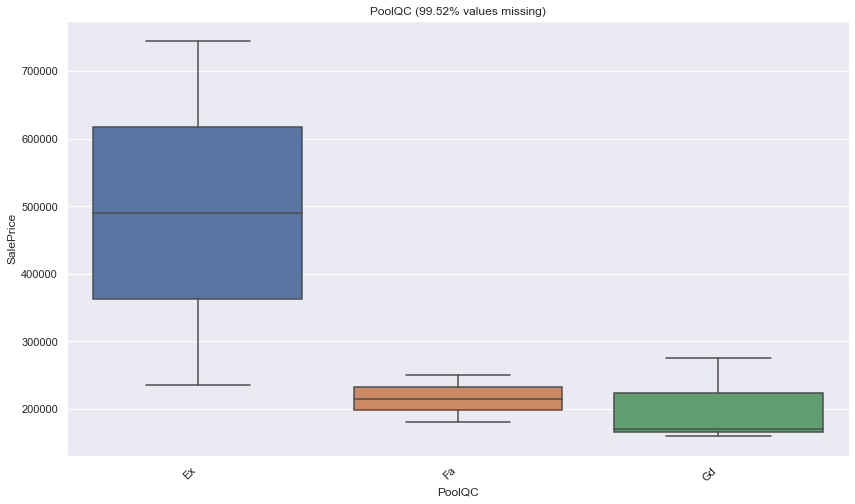

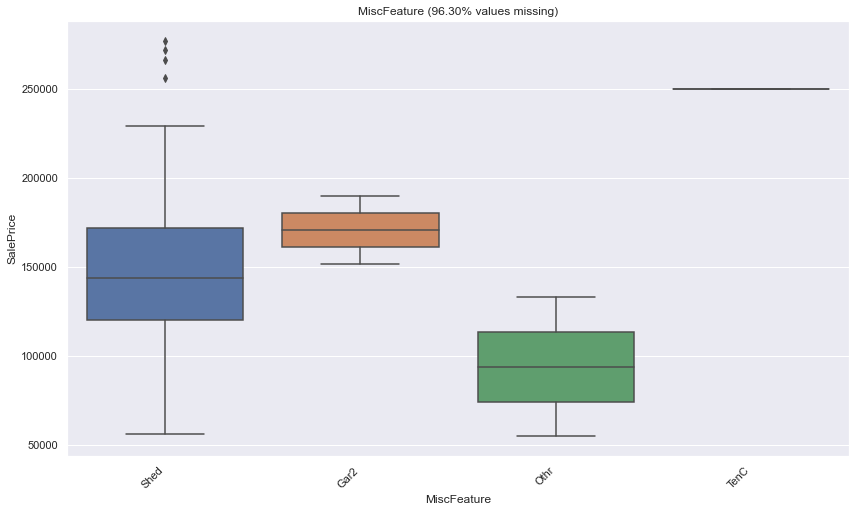

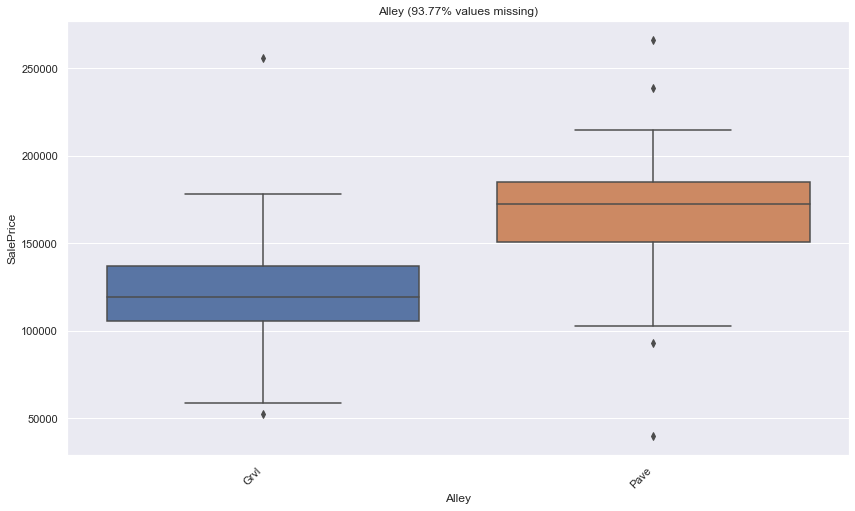

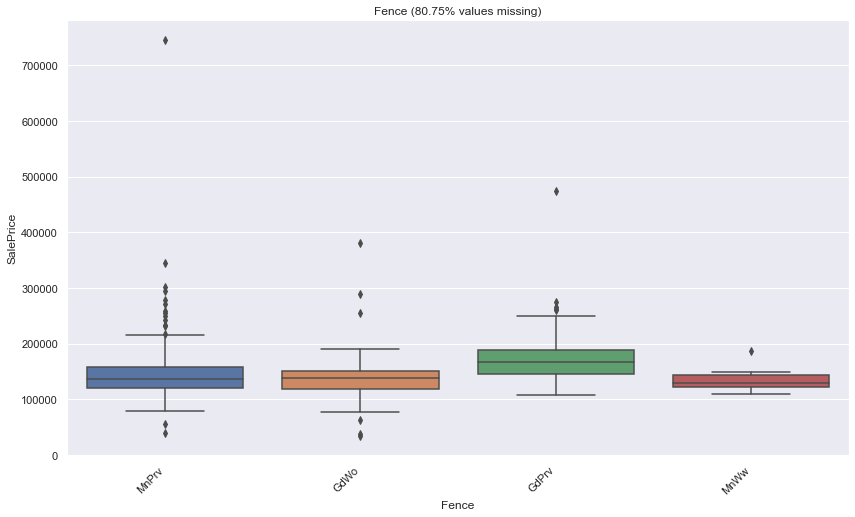

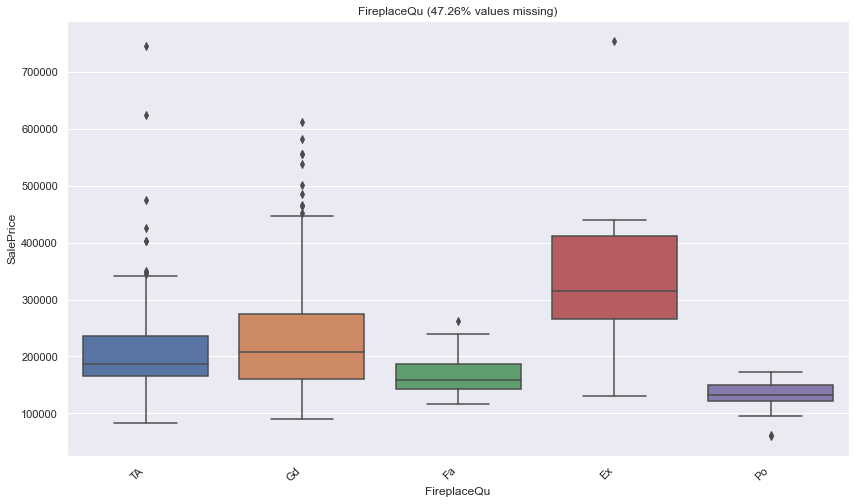

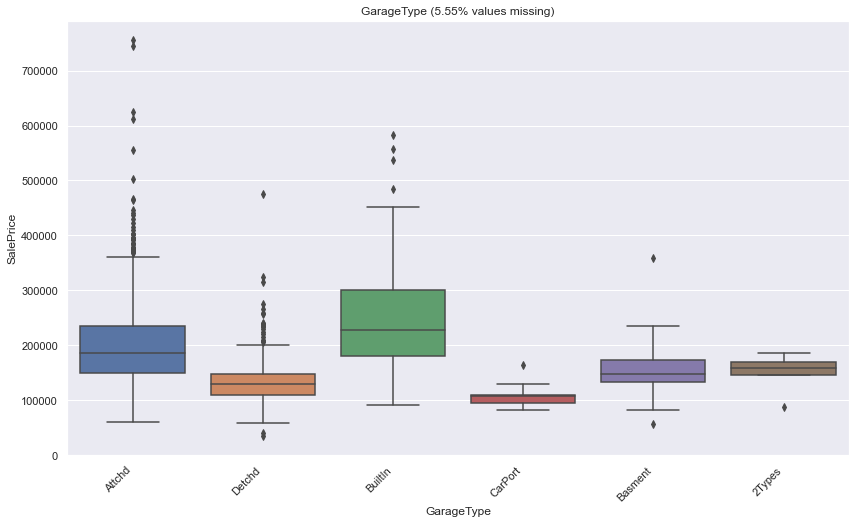

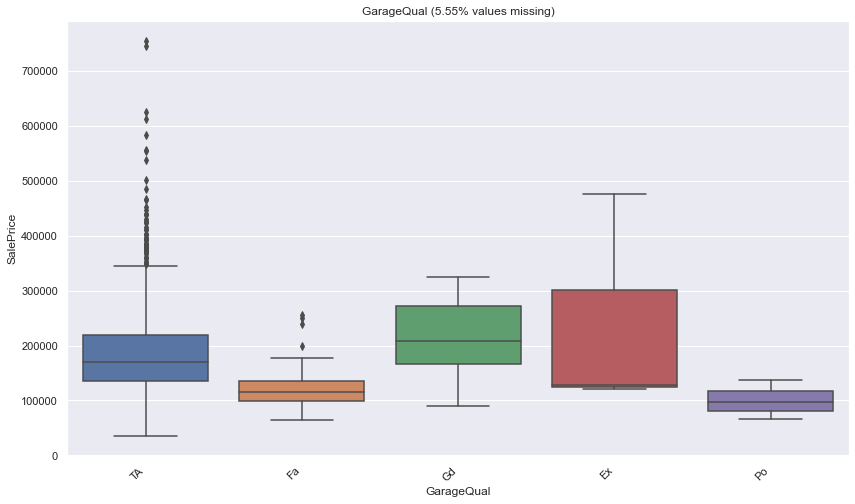

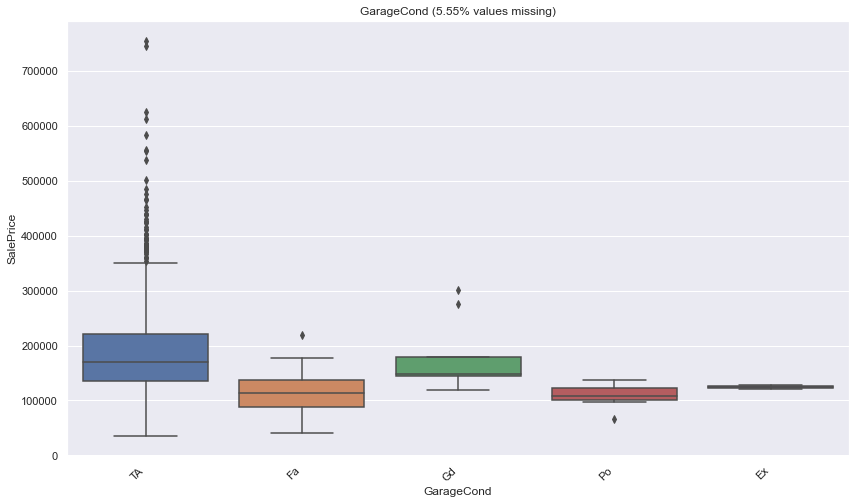

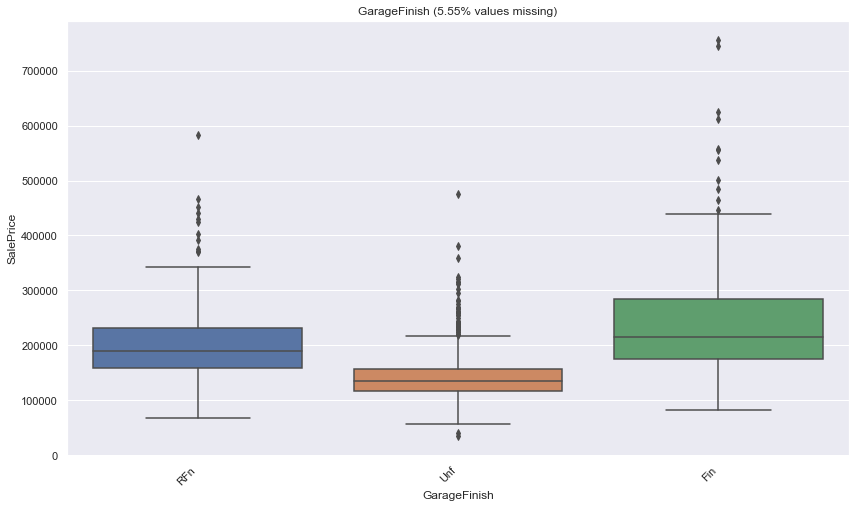

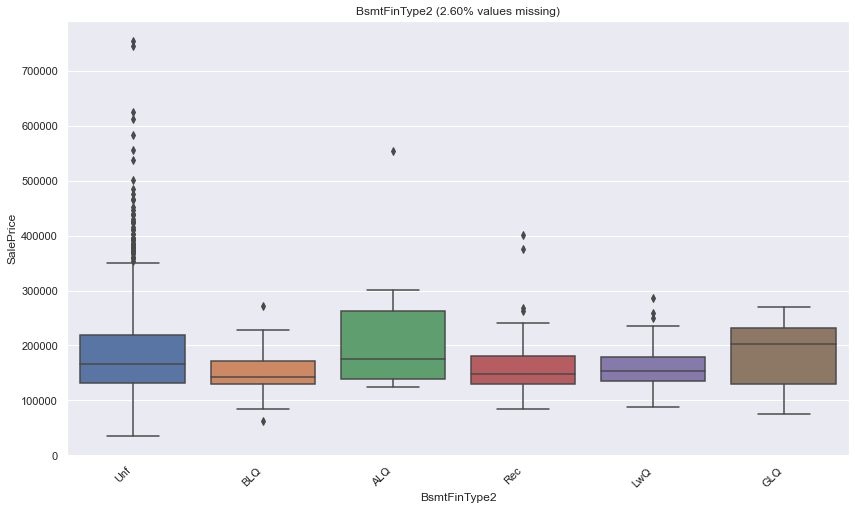

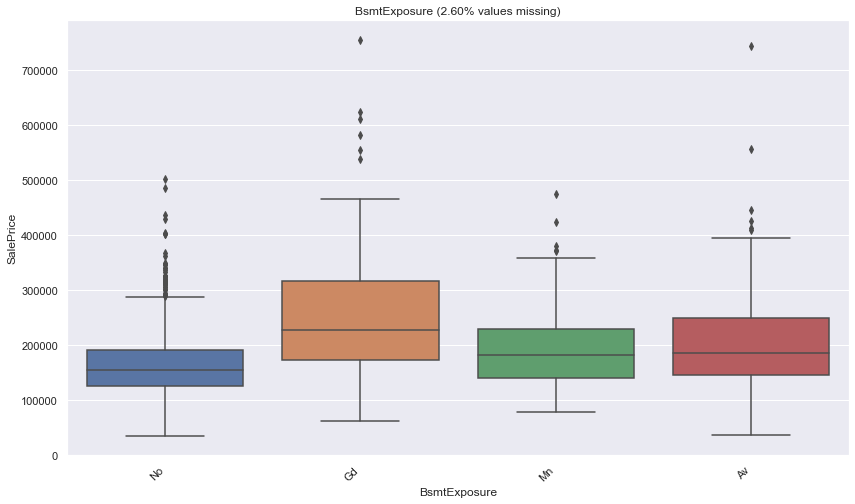

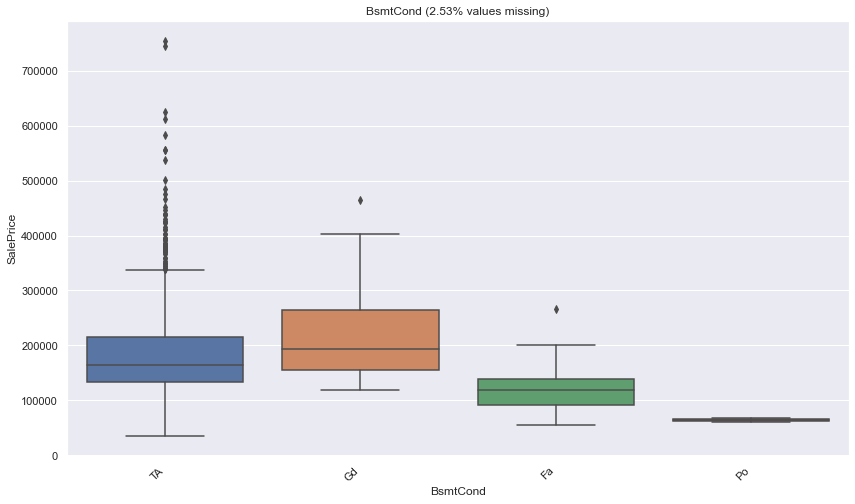

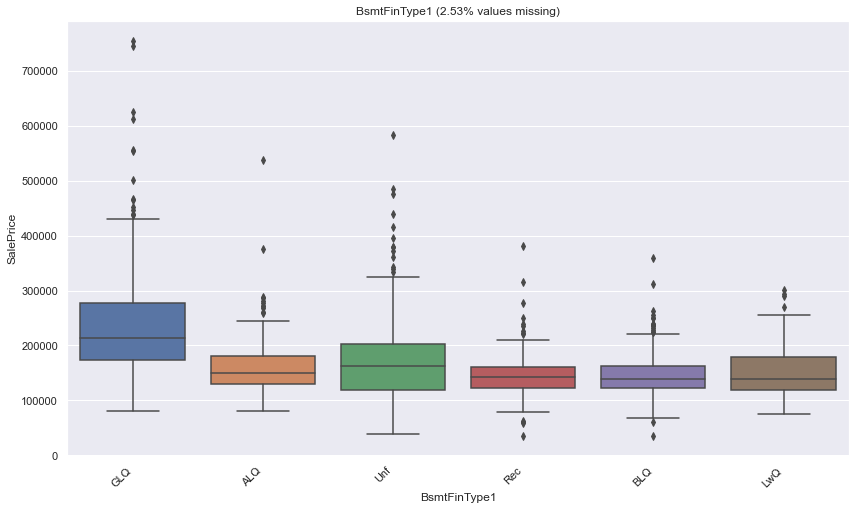

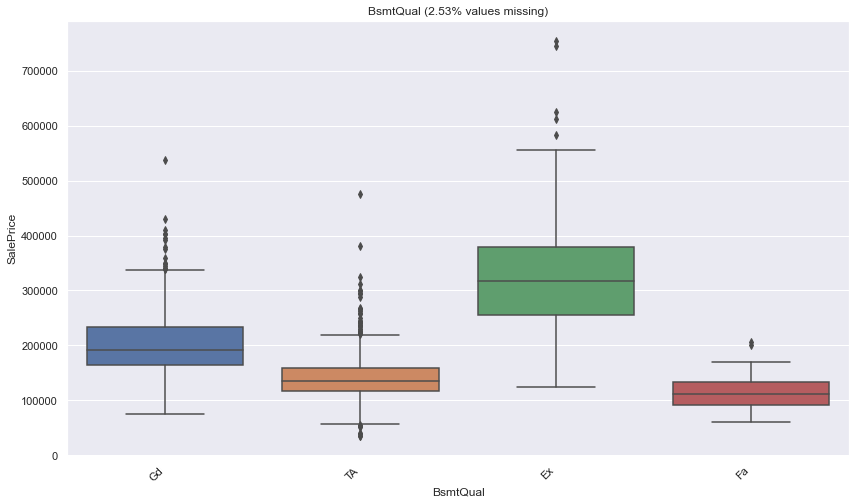

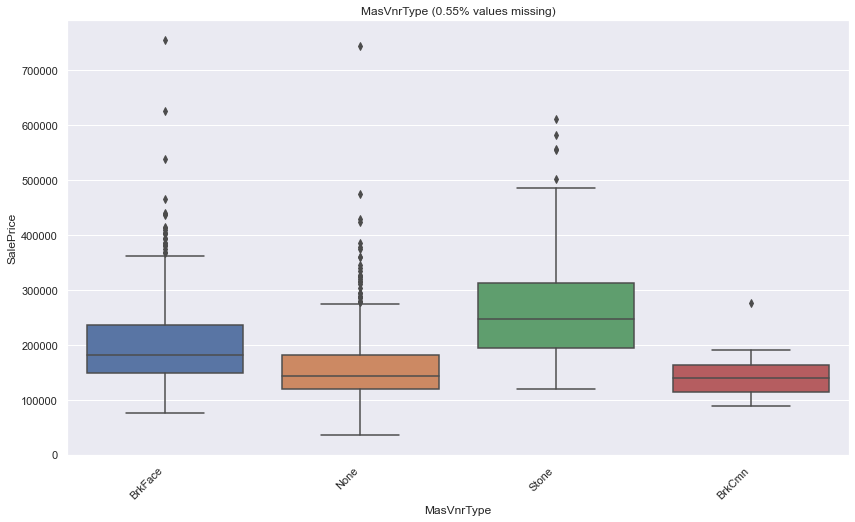

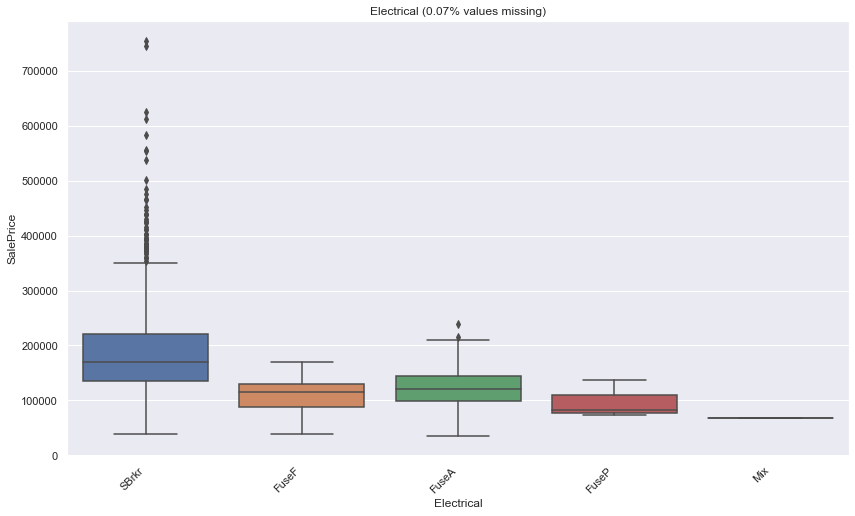

In [230]:
for object_col in missing_data_df.select_dtypes(object):
    title = "{} ({:.2f}% values missing)".format(object_col, missing_data.loc[object_col, "Percentage"] * 100)
    
    plt.figure(figsize=(14, 8))
    plot = sns.boxplot(x=object_col, y="SalePrice", data=missing_data_df)
    plot.set_title(title)
    plot.set_xticklabels(
        plot.get_xticklabels(),
        rotation=45,
        horizontalalignment="right"
    )

In [250]:
corr_matrix = missing_data_df.corr()
corr_matrix["SalePrice"]

LotFrontage     0.351799
GarageYrBlt     0.486362
MasVnrArea      0.477493
BedroomAbvGr    0.168213
BsmtHalfBath   -0.016844
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [254]:
def drop_cols_with_missing_data(df, threshold=0.05):
    missing_df = na_info(df)
    columns_to_drop = missing_df[missing_df["Percentage"] > threshold].index
    return df.drop(columns_to_drop, axis="columns")

In [255]:
data_after_drop = drop_cols_with_missing_data(data_explore, threshold=0.05)
data_after_drop

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500


#### *Fill in missing values or drop their rows*

### 2. Feature selection

#### *Drop attributes that don’t provide useful information for house price prediction*

### 3. Feature engineering

#### *Check if any numerical continuous features should be discretized*

#### *Discretize continuous features if needed*

#### *Decompose categorical features*

#### *Add promising transformations of features (e.g., log( x ), sqrt( x ), x 2 , etc.).*

#### *Check if it would make sense to aggregate features into new features*

#### *Aggregate features into new features, if it makes sense*

### 4. Feature scaling

#### *If your model requires it, standardize or normalize features*

## Calculate score
---

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
X_train_processed = pd.get_dummies(X_train)
rf.fit(X_train_processed, y_train)

In [154]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')